<a href="https://colab.research.google.com/github/BaruchMM/Relatividad-general-y-Cosmologia/blob/main/Problema_de_Kepler_relativista.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Problema de Kepler relativista
### Cuaderno interactivo con ejemplos de código
Este cuaderno provee al lector de teoría y el desarrollo de la ecuación de movimiento para un sistema relativista de dos cuerpos orbitando un centro de masa, conocido como problema de Kepler. Además, con la teoría desarrollada, se tendrán ejemplos con uso de código en python.

##Materia adicional



*   [Desarrollo explícito](https://drive.google.com/file/d/1IPEBJHkYnO5vR7KMg6o_87URCoaQjxQ9/view?usp=sharing)
*   [Modelado de la precesión en la órbita de mercurio con Matlab tomando la teoría newtoniana y relativista](http://repositorio.unap.edu.pe/handle/UNAP/13083)



In [ ]:
import matplotlib.animation as animation 
import matplotlib.pyplot as plt 
import pylab as pl
import numpy as np 
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as wd
import matplotlib.gridspec as gridspec
from scipy.integrate import odeint

##Teoría

Partiendo del Lagrangiano. Por interés en las órbitas temporales, tomamos $\mathcal{L}=-c^2$
 $$ \mathcal{L}=-\left( 1-\dfrac{2m}{r}\right)\dot{t}  +\dfrac{\dot{r}^2}{\left( 1-\dfrac{2m}{r}\right)} + r^2 \dot{\phi}^2=-c^2  $$

nótemos que $\dot{x}=\dfrac{dx}{ds}$ y que  
$$ m=\dfrac{GM}{c^2}= \left[ \dfrac{L^3M^{-1}T^{-2}}{L^2t^{-2}}\right]= \left[L\right] $$

Definiendo $k=\alpha\dot{t}$, $h=r^2\dot{\phi}$, el potencial como $V=-c^2-r^2\dot{\phi}^2+2\frac{mc^2}{r}-2mr\dot{\phi}^2$y despejando $\dot{r}$ obtenemos

$$\dot{r}^2= k^2-V_{(r)} $$



Para analizar órbitas, es más útil tener a todas las variables en función de un cierto ángulo, de manera que haremos un cambio de dependecia de $s\rightarrow \phi$, tal que $\dfrac{dr}{ds}=\dfrac{dr}{d\phi}\dot{\phi}$. Posteriormente se realiza otro cambio de variable  $u=\frac{1}{r}$ y aplicamos la definición del momento angular $h=r^2\dot{\phi}$. Con esto, obtenemos la ecuación diferencial siguiente

 $$ \left( \dfrac{du}{d\phi}\right)^2=\dfrac{k^2}{h^2}-\dfrac{c^2}{h^2}-u^2+2\frac{mc^2u}{ h^2}+2mu^3  $$
La resolución de la ecuación diferencial se simplifica si la derivamos y posteriormente la resolvemos.
$$ \dfrac{d^2u}{d\phi^2}+u=\dfrac{mc^2}{h^2}\left(1+3\dfrac{h^2}{c^2}u^2\right)$$
Para órbitas, el momento angular h es constante y tomándolo en un punto de retorno, $h=r_0v_0$ con r como una condición inicial $r_0$.
$$ \dfrac{d^2u}{d\phi^2}+u=\dfrac{mc^2}{h^2}\left(1+3\dfrac{r_0^2v_0^2}{c^2}u^2\right)$$
De manera que para $v< < c$ obtenemos el caso newtoniano y con $v$ suficientemente grande, se obtienen órbitas relativistas.

Para quitar las unidades definimos $u=\frac{\hat{u}}{L}$ donde L es una constante con dimensión de longitud y $\hat{u}$ no tiene dimensiones. Además $ c^2\dfrac{m}{h^2} L =1$ y $r_0=\hat{r}_0L$, entonces la ecuación diferencial se escribe como

$$ \dfrac{d^2\hat{u}}{d\phi^2}+\hat{u}=1 + \beta\hat{u}^2 $$

donde  $ \beta=3\hat{r}^2_0\frac{v^2}{c^2}=3\frac{r^2_0}{L^2}\frac{v^2}{c^2}=3\frac{h^2}{L^2c^2} $

**Para ver el desarrollo completo consulte en el material adicional el enlace de "Desarrollo explícito"**


##Resolución de la ecuación diferencial

Definimos valores de theta

In [ ]:
theta=np.linspace(0*np.pi,15*np.pi,10000)

###Solución analítica
Suponiendo que $\beta$ es muy pequeña, tomamos como parte de la solución en el $\beta u^2$ el caso newtoniano en el que $u=1+Bcos(\phi)$, obteniendo la ecuación diferencial reescrita con estas consideraciones como:
 $$ \dfrac{d^2\hat{u}}{d\phi^2}+\hat{u}=1 + \beta(1+e\cos(\phi))^2 $$
La cual tiene como solucion:
 $$u=(1+e\cos(\phi))+\beta e\phi \sin(\phi))+\beta e^2 \left(\frac{1}{2}-\frac{cos(\phi)}{6}\right)    $$

En esta solución, el término $[1+e\cos(\phi)]$ es la parte newtoniana de la órbita, por otra parte el segundo término $[\beta e\phi \sin(\phi)]$ es la parte responsable de la preseción de la órbita. Finalmente la última parte $\left[\beta e^2 \left(\frac{1}{2}-\frac{cos(\phi)}{6}\right) \right]$ añade a la órbita un aumento del rádio periódico que se asemeja a una ala, por ello será despresiada en esta solución.

Entonces se tiene la siguiente solución. 
$$u=1+e\cos(\phi)+\beta e\phi \sin(\phi))  $$

Si además se aproxima que $\sin(\phi)\approx \phi$ y $\cos(\phi)=1$
$$u=1+e\cos(\phi(1-\beta))$$

Entonces definimos nuestras condiciones iniciales

In [ ]:
r=1.5
B=r-1

Definimos nuestra solución semianalítica de la ecuación diferencial

In [ ]:
def solA(B,r,theta,beta):
  sol=1+B*np.cos(theta*(1-beta))
  return sol

Finalmente graficamos la solución, con un parámetro $\beta$ que es manipulable.

In [ ]:

def plotFunction1 (beta):
    #Condiciones iniciales
    rho=1/solA(B,r,theta,beta)
    x=rho*np.cos(theta)
    y=rho*np.sin(theta)
    plt.figure(figsize=(8,8))
    #ax.set_xlim(-2,2)
    #ax.set_ylim(-2,2)
    plt.plot(x,y,label=r'$\beta =$'+str(beta))
    plt.plot(0,0,marker="o", color="orange")
    plt.xlabel('x')
    plt.ylabel('y')
    plt.grid()
    plt.legend()
    plt.show()
interact(plotFunction1,beta=(0,0.1,0.0005))

interactive(children=(FloatSlider(value=0.05, description='beta', max=0.1, step=0.0005), Output()), _dom_class…

<function __main__.plotFunction1>

###Solución numérica
Si se define una derivada como 
$$y_1= \hat{u}$$
es decir, la solución de la ecuación diferencial original, y 
$$ y_2=\hat{u}' \phantom{aaa} t.q.\phantom{aaa}\dfrac{dy2}{d\phi}=1-y_1+\beta y_1^2$$





In [ ]:
def model(z,t,beta):
    y1 = z[0]
    y2 = z[1]
    dy1dt = y2
    dy2dt = 1-y1+beta*y1**2
    dzdt = [dy1dt,dy2dt]
    return dzdt

Defnimos nuestras condiciones iniciales, teniendo en cuenta que $y2=0$

In [ ]:
z0 = [1/r,0.]

Para un parámetro $\beta$, graficamos la solución numérica

In [ ]:
def plotFunction3 (beta):
    z = odeint(model,z0,theta,args=(beta,))
    plt.figure(figsize=(8,8))
    plt.plot(np.cos(theta)/(z[:,0]),-np.sin(theta)/(z[:,0]),'C0-',label=r'$\beta =$'+str(beta)) 
    #se puso un signo (-) en el seno para que la gráfica coincidiera con la solución analítica
  ###
    plt.xlabel(r'$x$')
    plt.ylabel(r'$y$')
    plt.plot(0,0,marker="o", color="orange")
    plt.legend()
    plt.grid()
    plt.axis('square')
    plt.show()
interact(plotFunction3,beta=(0,0.1,0.001))

interactive(children=(FloatSlider(value=0.05, description='beta', max=0.1, step=0.001), Output()), _dom_classe…

<function __main__.plotFunction3>

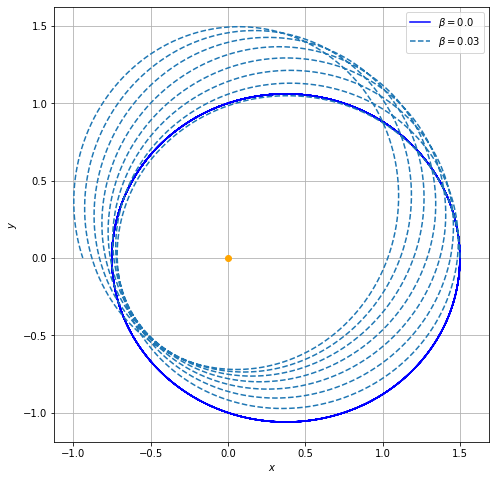

In [ ]:
beta1=0.0
beta2=0.03
# Función para resolver las ecuaciones diferenciales ordinarias con las condiciones iniciales z0
z1 = odeint(model,z0,theta,args=(beta1,))
z2 = odeint(model,z0,theta,args=(beta2,))

plt.figure(figsize=(8,8))
plt.plot(np.cos(theta)/(z1[:,0]),np.sin(theta)/(z1[:,0]),'b-',label=r'$\beta =$'+str(beta1))
plt.plot(np.cos(theta)/(z2[:,0]),np.sin(theta)/(z2[:,0]),'C0--',label=r'$\beta =$'+str(beta2))
plt.xlabel(r'$x$')
plt.ylabel(r'$y$')
plt.plot(0,0,marker="o", color="orange")
plt.legend()
plt.grid()
plt.axis('square')

plt.show()

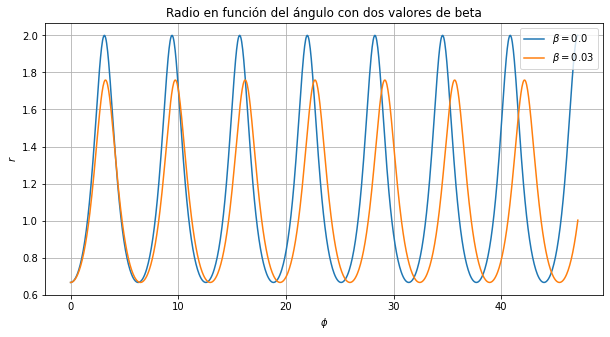

In [ ]:
beta1=0.0
beta2=0.03  
# Función para resolver las ecuaciones diferenciales ordinarias con diferentes valores de betta
z1 = odeint(model,z0,theta,args=(beta1,))
z2 = odeint(model,z0,theta,args=(beta2,))

plt.figure(figsize=(10,5))
plt.plot(theta, 1/z1[:,0],label=r'$\beta =$'+str(beta1))
plt.plot(theta, 1/z2[:,0],label=r'$\beta =$'+str(beta2))
plt.ylabel(r'$r$')
plt.xlabel(r'$ϕ$')
plt.title('Radio en función del ángulo con dos valores de beta')
plt.legend()
plt.grid()

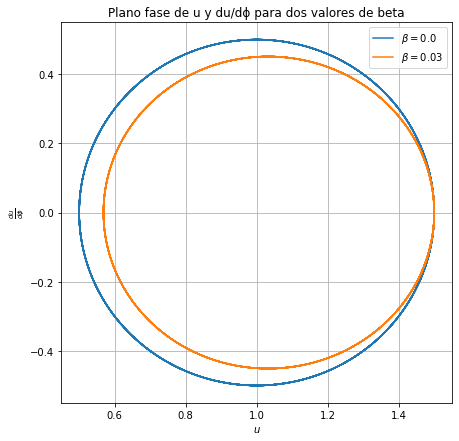

In [ ]:
plt.figure(figsize=(7,7))
plt.plot(z1[:,0],z1[:,1],label=r'$\beta =$'+str(beta1))
plt.plot(z2[:,0],z2[:,1],label=r'$\beta =$'+str(beta2))
plt.xlabel(r'$u$')
plt.ylabel(r'$\frac{du}{dϕ}$')
plt.title('Plano fase de u y du/dϕ para dos valores de beta')
plt.legend()
plt.grid()

#Comparación entre resultado analítico y numérico

In [ ]:
#Se definen 200 valores de theta entre -2pi y 2pi
theta = np.linspace(0,15*np.pi,1000)
def plotFunction1 (beta):
  #Condiciones iniciales
    #radio en phi=0
    r=2/3
    z0 = [1/r,0.]
    #Excentricidad
    B=0.5

  #Solución semianalítica
    rho = 1/(solA(B,r,theta,beta))
    x=rho*np.cos(theta)
    y=rho*np.sin(theta)
    plt.figure(figsize=(8,8))
    plt.plot(x,y,label=r'Solución semianaitica')
    plt.plot(0,0,marker="o", color="orange",label='Beta='+str(beta))
  #Solución numérica
    z = odeint(model,z0,theta,args=(beta,))
    plt.plot(np.cos(theta)/(z[:,0]),np.sin(theta)/(z[:,0]),'g-',label=r'Solución numérica')
###################
    plt.xlabel(r'$x$')
    plt.ylabel(r'$y$')
    plt.plot(0,0,marker="o", color="orange")
    plt.legend()
    plt.grid()
    plt.title('Comparación entre las órbitas descritas por la solución semianalítica y la numérica')
    plt.axis('square')
    plt.show()
interact(plotFunction1,beta=(0,0.02,0.0005))

interactive(children=(FloatSlider(value=0.01, description='beta', max=0.02, step=0.0005), Output()), _dom_clas…

<function __main__.plotFunction1>

A continuación se hace una comparación del error que se tiene entre las soluciones. 
Definimos la solución semianalítica como $\rho$ y la numérica como $\tilde{\rho}$. Entonces tenemos un error relativo de la siguiente manera:

$$\dfrac{\Delta \rho}{\rho}=\dfrac{\tilde{\rho}-\rho}{\rho}$$

La línea sólida es la solución semianalítica y la rayada es la solución numérica.

In [ ]:
def plotFunction1 (beta):
  #Condiciones iniciales
    #radio en phi=0
    r=2/3
    z0 = [1/r,0.]
    #Excentricidad
    B=0.5
    fig,(ax1,ax2)=plt.subplots(2,1,figsize=(11,8))
    gs=gridspec.GridSpec(2,1, height_ratios=[2,1])
    ax1=plt.subplot(gs[0])
###
#colors=['b','orange','g']
  #Solución semianalítica
    rho = 1/(solA(B,r,theta,beta))
  #Solución numérica
    z = 1/( odeint(model,z0,theta,args=(beta,)))
    ax1.plot(theta, rho)
    ax1.plot(theta, z[:,0], '--')
    plt.grid()
    ax2 = plt.subplot(gs[1], sharex = ax1)
    ax2.plot(theta,100*((-rho+z[:,0])/rho),lw=2)
    plt.grid()
    ax1.set_ylabel(r'$\rho$')
    ax2.set_xlabel(r'$\theta$')
    ax2.set_ylabel(r'$\Delta\rho/\rho (\%) $')
    plt.setp(ax1.get_xticklabels(), visible=False)
    plt.subplots_adjust(hspace=.0)
interact(plotFunction1,beta=(0,0.02,0.0005))

interactive(children=(FloatSlider(value=0.01, description='beta', max=0.02, step=0.0005), Output()), _dom_clas…

<function __main__.plotFunction1>

## Espacio fase de u y u'

In [ ]:
theta = np.linspace(0,15*np.pi,1000)
def plotFunction3 (beta):
  #Initial conditions
    #radio en phi=0
    r=2/3
    z0 = [1/r,0.]
    #Excentricidad
    B=0.5


  #Solución numérica
    # Función que regresa el sistema de ecuaciones diferenciales
    def model(z,t,beta):
        y1 = z[0]
        y2 = z[1]
        dy1dt = y2
        dy2dt = 1.-y1+beta*y1**2
        dzdt = [dy1dt,dy2dt]
        return dzdt
    # Función para resolver las ecuaciones diferenciales ordinarias con las condiciones iniciales z0
    z = odeint(model,z0,theta,args=(beta,))
    

  #Solución semianalítica
    u=1+B*np.cos(theta*(1-beta))
    up=-B*np.sin(theta*(1-beta))*(1-beta)
    
    plt.figure(figsize=(10,10))
    plt.plot(u,up,label=r'Solución semianalítica')
    plt.plot(z[:,0],z[:,1],'-g',label=r'Solución numérica')
    plt.title('radio en función del ángulo')
    plt.title('Plano fase de u y $\hat{u}$')
    plt.xlabel('$\hat{u}$')
    plt.ylabel('$d\hat{u}/d θ$')
    plt.grid()
    plt.legend()
    plt.show()


interact(plotFunction3,beta=(0,0.1,0.005))

interactive(children=(FloatSlider(value=0.05, description='beta', max=0.1, step=0.005), Output()), _dom_classe…

<function __main__.plotFunction3>

# Órbita para el caso de Mercurio

Para un caso específico, se utilizarán datos de Mercurio y su órbita. Se sabe que por las características de su movmimiento, tiene una excentricidad de $B=0.2056$ y un momento angular de $J= 8,9613\times 10^{38}\frac{m^2 kg }{s}$, entonces en $\phi=0$ con mercurio con masa $m=3.302\times10^{23}kg$ se tiene que
$$ h=\dfrac{J}{m} = 2.7139\times 10^{15}\frac{m^2}{s}=1.21267\times 10^{-7}\frac{{UA}^2}{s}$$
con ello podemos calcular $\beta$ usando la velocidad de la luz al cuadrado en unidades astronómicas (UA), esto es $c^2=249005.99 \frac{UA^2}{s^2}$
$$ \beta=3\dfrac {h^2}{L^2c^2}=3\dfrac{m^2c^2}{h^2}$$
donde $m=\dfrac{GM}{c^2}$

*Si gusta usar otro caso específico, es necesario revisar los datos ingresados en las "condiciones iniciales"*

7.985701137889455e-08


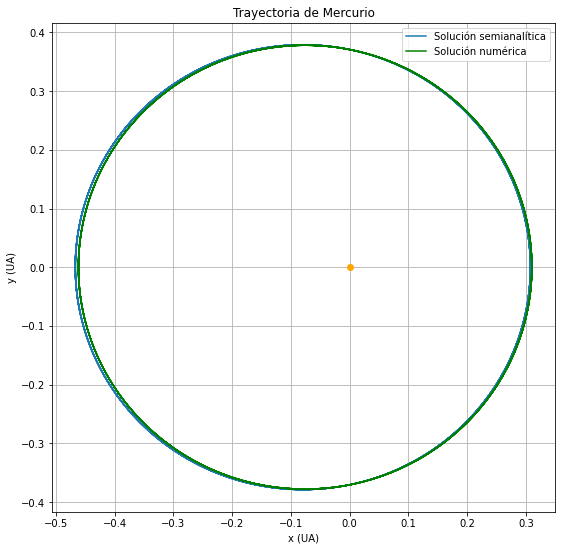

In [ ]:
theta=np.linspace(0,10*np.pi,1000)

#Initial conditions
  #radio en phi=0 en UA
r0=0.31
  #Masa mayor
M = 1*(1.989*(10**30))
  #Masa menor
masa=(3.302*10**23)
  #Momento angular sin masa h=J/masa
h=1.21267*10**-7
  #Excentricidad
B=0.2056

#Constantes en UA
  #Velocidad de la luz
c=(2.998*10**8)*(1/149597870700)
  #Constante de gravitación universal
G=(6.674*(10**-11))*(1/(149597870700**3))

#Calculo de m, beta y L
m=G*M/(c**2)
beta=(3*m**2*c**2)/(h**2)
L=h**2/(m*c**2)


#Solucion semianalítica
mercurio=1+B*np.cos(theta*(1-beta))
rho=1/mercurio
x=rho*np.cos(theta)*L
y=rho*np.sin(theta)*L

#Solución numérica 
z0 = [L/r0,0.]
def model(z,t,beta):
    y1 = z[0]
    y2 = z[1]
    dy1dt = y2
    dy2dt = 1.-y1+beta*y1**2
    dzdt = [dy1dt,dy2dt]
    return dzdt
mercurioz = odeint(model,z0,theta,args=(beta,))


plt.figure(figsize=(9,9))
plt.plot(x,y,label=r'Solución semianalítica')
plt.plot(L*np.cos(theta)/(z[:,0]),L*np.sin(theta)/(z[:,0]),'g-',label=r'Solución numérica')
plt.plot(0,0,marker="o", color="orange")
plt.title('Trayectoria de Mercurio')
plt.xlabel('x (UA)')
plt.ylabel('y (UA)')
plt.legend()
plt.grid()
print(beta)
plt.show()


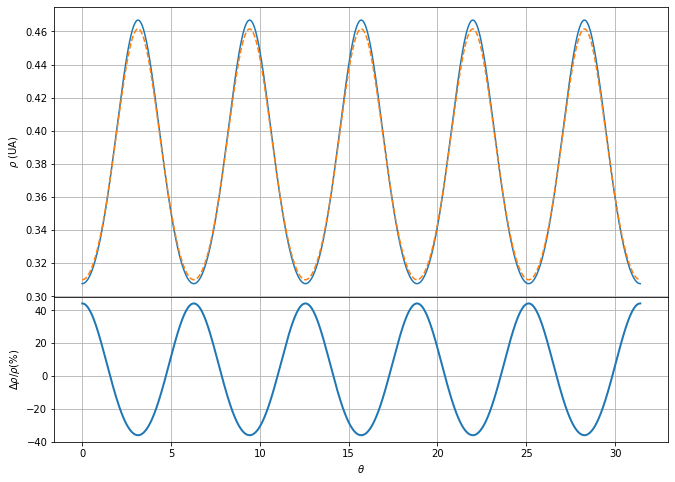

In [ ]:

fig,(ax1,ax2)=plt.subplots(2,1,figsize=(11,8))
gs=gridspec.GridSpec(2,1, height_ratios=[2,1])
ax1=plt.subplot(gs[0])
###

ax1.plot(theta, L/mercurio)
ax1.plot(theta, L/mercurioz[:,0], '--')
plt.grid()
ax2 = plt.subplot(gs[1], sharex = ax1)
ax2.plot(theta,100*((-rho+z[:,0])/rho),lw=2)
plt.grid()
ax1.set_ylabel(r'$\rho$ (UA)')
ax2.set_xlabel(r'$\theta$')
ax2.set_ylabel(r'$\Delta\rho/\rho (\%) $')
plt.setp(ax1.get_xticklabels(), visible=False)
plt.subplots_adjust(hspace=.0)